# Phase Transition Final Project

Kawasaki Dynamics

- Ising model have fixed spins. Don't change during simulation, but allowed to move (as in swap places)
- Movement Rules
1) For particles, A and B, if spins are the same, do nothing
2) if spins A and B are different, then calculate current system energy (E) and system energy if places were swapped (E')
3) Calculate probabilities according to Boltzmann distributions, p and p' respectively
4) With probability, p'/ p + p', if it hits, then swap the particles. 


Goal is to decrease the energy for every step


Link: https://rf.mokslasplius.lt/kawasaki-ising-model/

JS link: https://github.com/physrisk/website-source/blob/main/uploads/models/physics-models/ising-model/kawasaki.js

# 
Farkas Paper Notes

Simulation Details

MxN lattice (M = 400; N = 80)
periodic in x-direction
non-periodic in y-direction
3 main states (active, inactive, and refractory), but it can be split into more states 

Total activation effect factors in local and global interactions



# Wave Propagation in All Directions


MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as MexicanWave.gif


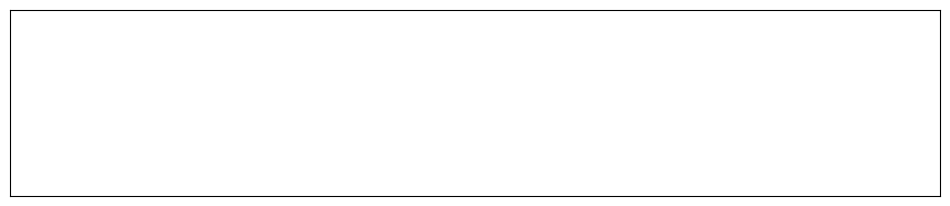

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

#Parameters
GRID_SIZE = (20,100) #Rows, Columns
THRESHOLD = 1.0 #Activation threshold 
SPONTANEOUS_PROB = 0.00
REFRACTORY_PERIOD = 15  
CUTOFF_RADIUS = 3  
MAX_ITERATIONS = 50    
SENSITIVITY_CONTROL = 1.0  #Control parameter that affects wave propagation  
R = 3.0 #Characteristic length for local interactions

# Initialize grid: 0 (excitable), 1 (active), -1 (refractory)
lattice = np.zeros(GRID_SIZE, dtype=int)
refractory_counters = np.zeros(GRID_SIZE, dtype=int)  # Track refractory time

#Small little nucleation site
center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2
lattice[center_x - 1:center_x + 1, center_y - 1:center_y + 1] = 1



#Create a weight matrix for the Mexican wave as this describes neighbor influence
def create_weight_matrix(radius):
    weight_matrix = np.zeros((2*radius+1, 2*radius+1))
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            distance = np.sqrt(dx**2 + dy**2)
            if distance <= radius:
                weight_matrix[dx + radius, dy + radius] = np.exp(-distance / R)
    return weight_matrix    

weights = create_weight_matrix(CUTOFF_RADIUS)



#Global interactions
def compute_global_interaction(lattice, x, y, sensitivity_control):
    rows, cols = lattice.shape
    total_active_distance = 0
    weight_sum = 0

    for j in range(cols):
        if j != y:
            distance = min(abs(j - y), cols - abs(j - y))
            weight = np.exp(-distance / R)  
            total_active_distance += weight * (lattice[x, j] == 1)
            weight_sum += weight


    x_average = total_active_distance / (weight_sum + 1e-10)
    velocity = x_average - y


    if velocity < 0:
        return np.exp(-sensitivity_control * velocity)
    else:
        return 1



def update_wave(lattice, refractory_counters):
    new_grid = np.copy(lattice)
    rows, cols, = lattice.shape

    for x in range(rows):
        for y in range(cols):
            if lattice[x, y] == 0:
                #Local influence
                local_influence = 0
                for i in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for j in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx = x + i
                        ny = (y + j) % cols #Periodic boundary conditions

                        if 0 <= nx < rows and lattice[nx, ny] == 1:
                            local_influence += weights[i + CUTOFF_RADIUS, j + CUTOFF_RADIUS]

                #Global influence
                global_influence = compute_global_interaction(lattice, x, y, SENSITIVITY_CONTROL)

                #Total influence
                total_influence = local_influence * global_influence


                # Activation conditions
                if total_influence >= THRESHOLD:
                    new_grid[x,y] = 1 #Activate
            elif lattice[x, y] == 1:
                new_grid[x,y] = -1 #Refractory state
                refractory_counters[x, y] = REFRACTORY_PERIOD #Set refractory counter
            elif lattice[x,y] == -1:
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0

    return new_grid

# Simulate the Mexican wave
fig, ax = plt.subplots(figsize=(12,6))
cmap = ListedColormap(['red', 'white', 'black'])
norm = plt.Normalize(vmin=-1, vmax=1)

cax = ax.matshow(lattice, cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])


def animate(frame):
    global lattice, refractory_counters
    lattice = update_wave(lattice, refractory_counters)
    cax.set_data(lattice)
    return [cax]

ani = animation.FuncAnimation(fig, animate, frames=MAX_ITERATIONS, interval=200, blit=True)

ani.save('MexicanWave.gif', writer='imagemagick', fps=5)

print('Animation saved as MexicanWave.gif')





# Wave Propagation in One Direction - To Simulate Mexican Wave

Average Survival Time <ts>: 0.0


MovieWriter imagemagick unavailable; using Pillow instead.


Animation saved as MexicanWave_highsens.gif


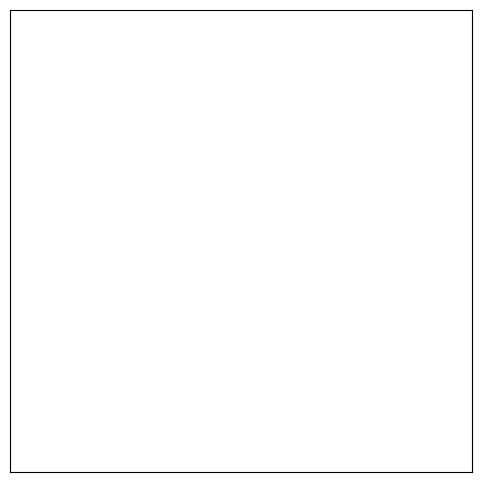

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

#Parameters
GRID_SIZE = (50,50) #Rows, Columns
THRESHOLD = 1.0 #Activation threshold 
SPONTANEOUS_PROB = 0.0
REFRACTORY_PERIOD = 20  
CUTOFF_RADIUS = 3  
MAX_ITERATIONS = 80  
SENSITIVITY_CONTROL = 10.0  #Control parameter that affects wave propagation  
R = 3.0 #Characteristic length for local interactions

# Initialize grid: 0 (excitable), 1 (active), -1 (refractory)
lattice = np.zeros(GRID_SIZE, dtype=int)
refractory_counters = np.zeros(GRID_SIZE, dtype=int)  # Track refractory time

#Small little nucleation site
center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2
lattice[center_x -1:center_x + 1, center_y] = 1 #Asymmetric nucleation site



#Create a weight matrix for the Mexican wave as this describes neighbor influence
def create_weight_matrix(radius):
    weight_matrix = np.zeros((2*radius+1, 2*radius+1))
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            distance = np.sqrt(dx**2 + dy**2)
            if distance <= radius:
                weight_matrix[dx + radius, dy + radius] = np.exp(-distance / R)
    return weight_matrix    

weights = create_weight_matrix(CUTOFF_RADIUS)



#Global interactions
def compute_global_interaction(lattice, x, y, sensitivity_control):
    rows, cols = lattice.shape
    total_active_distance = 0
    weight_sum = 0

    for j in range(cols):
        if j != y:
            distance = min(abs(j - y), cols - abs(j - y))
            weight = np.exp(-distance / R)  
            total_active_distance += weight * (lattice[x, j] == 1)
            weight_sum += weight


    x_average = total_active_distance / (weight_sum + 1e-10)
    velocity = x_average - y


    if velocity >= 0:
        return np.exp(-sensitivity_control * velocity)
    else:
        return 1

#Order Parameter
def measure_survival_time(lattice, max_iterations):
    survival_time = 0
    rows, cols = lattice.shape
    for t in range(max_iterations):
        left_active = np.any(lattice[:, :cols // 2] == 1)
        right_active = np.any(lattice[:, cols // 2:] == 1)

        if not (left_active and right_active):  # Symmetry broken
            survival_time = t
            break
        lattice[:] = update_wave(lattice, refractory_counters)
    return survival_time



def update_wave(lattice, refractory_counters):
    new_grid = np.copy(lattice)
    rows, cols, = lattice.shape

    for x in range(rows):
        for y in range(cols):
            if lattice[x, y] == 0:
                #Local influence
                local_influence = 0
                for i in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for j in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx = x + i
                        ny = (y + j) % cols #Periodic boundary conditions

                        if 0 <= nx < rows and lattice[nx, ny] == 1:
                            local_influence += weights[i + CUTOFF_RADIUS, j + CUTOFF_RADIUS]

                #Global influence
                global_influence = compute_global_interaction(lattice, x, y, SENSITIVITY_CONTROL)

                #Total influence
                total_influence = global_influence * local_influence


                # Activation conditions
                if total_influence >= THRESHOLD:
                    new_grid[x,y] = 1 #Activate
            elif lattice[x, y] == 1:
                new_grid[x,y] = -1 #Refractory state
                refractory_counters[x, y] = REFRACTORY_PERIOD #Set refractory counter
            elif lattice[x,y] == -1:
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0

    return new_grid


num_simulations = 100
survival_times = []

for _ in range(num_simulations):
    lattice[:] = np.zeros(GRID_SIZE)
    lattice[center_x - 1:center_x + 1, center_y] = 1
    survival_times.append(measure_survival_time(lattice, MAX_ITERATIONS))

average_survival_time = np.mean(survival_times)
print(f"Average Survival Time <ts>: {average_survival_time}")

# Simulate the Mexican wave
fig, ax = plt.subplots(figsize=(12,6))
cmap = ListedColormap(['red', 'white', 'black'])
norm = plt.Normalize(vmin=-1, vmax=1)

cax = ax.matshow(lattice, cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])


def animate(frame):
    global lattice, refractory_counters
    lattice = update_wave(lattice, refractory_counters)
    cax.set_data(lattice)
    return [cax]

ani = animation.FuncAnimation(fig, animate, frames=MAX_ITERATIONS, interval=200, blit=True)

ani.save('MexicanWave_highsens.gif', writer='imagemagick', fps=10)

print('Animation saved as MexicanWave_highsens.gif')





# Test CASE

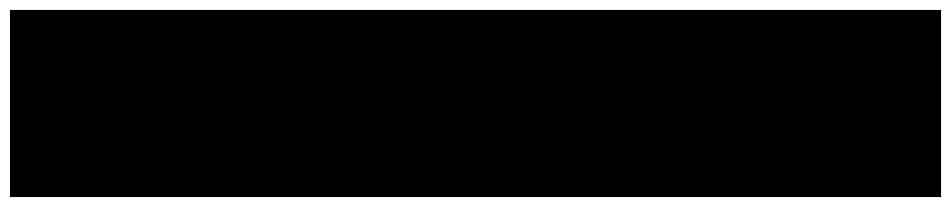

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.animation import FuncAnimation

# Parameters
GRID_SIZE = (20, 100)
THRESHOLD = 1.0
SPONTANEOUS_PROB = 0.0
REFRACTORY_PERIOD = 20
CUTOFF_RADIUS = 3
SENSITIVITY_CONTROL = 10.0  # Sensitivity control S
R = 3.0
X = 100  # Characteristic length for long-range interactions
MAX_ITERATIONS = 500

# Initialize grid
def initialize_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2

    # Nucleation center with asymmetry
    grid[center_x - 1:center_x + 1, center_y:center_y + 3] = 1  # Favor right propagation
    return grid, refractory_counters

# Compute weighted average position x_i^(a)
def compute_weighted_average(grid, x, y):
    cols = grid.shape[1]
    weighted_sum = 0
    total_weight = 0

    for j in range(cols):
        if grid[x, j] == 1:  # Active particle
            dx = min(abs(j - y), cols - abs(j - y))  # Shortest periodic distance
            weight = np.exp(-dx / X)
            weighted_sum += dx * weight
            total_weight += weight

    if total_weight == 0:
        return 0  # Neutral influence if no active particles

    return weighted_sum / total_weight

# Compute velocity v_i^(a)
def compute_velocity(x_avg_current, x_avg_previous):
    return x_avg_current - x_avg_previous

# Compute global interaction term G_i
def compute_global_influence(velocity, sensitivity_control):
    if velocity < 0:  # Approaching wave
        return 1
    else:  # Departing wave
        return np.exp(-sensitivity_control * velocity)

# Update wave
def update_wave(grid, refractory_counters, x_avg_previous):
    new_grid = np.copy(grid)
    x_avg_current = np.zeros(grid.shape)

    rows, cols = grid.shape
    for x in range(rows):
        for y in range(cols):
            if grid[x, y] == 0:  # Excitable
                local_influence = 0
                for dx in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for dy in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx, ny = x + dx, (y + dy) % cols
                        if 0 <= nx < rows and grid[nx, ny] == 1:
                            distance = np.sqrt(dx**2 + dy**2)
                            if distance <= R:
                                local_influence += np.exp(-distance / R)

                # Compute weighted average position x_i^(a)
                x_avg_current[x, y] = compute_weighted_average(grid, x, y)

                # Compute velocity v_i^(a)
                velocity = compute_velocity(x_avg_current[x, y], x_avg_previous[x, y])

                # Compute global influence G_i
                global_influence = compute_global_influence(velocity, SENSITIVITY_CONTROL)

                # Total influence
                total_influence = local_influence * global_influence

                if total_influence > THRESHOLD:
                    new_grid[x, y] = 1  # Activate
            elif grid[x, y] == 1:  # Active
                new_grid[x, y] = -1  # Refractory state
                refractory_counters[x, y] = REFRACTORY_PERIOD
            elif grid[x, y] == -1:  # Refractory
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0  # Return to excitable state

    return new_grid, x_avg_current

# Visualization
def run_simulation():
    grid, refractory_counters = initialize_grid()
    x_avg_previous = np.zeros(GRID_SIZE)  # Initialize x_avg at t-1

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = ListedColormap(["white", "black", "red"])
    norm = Normalize(vmin=-1, vmax=1)
    cax = ax.matshow(grid, cmap=cmap, norm=norm)
    plt.xticks([])
    plt.yticks([])

    def animate(frame):
        nonlocal grid, refractory_counters, x_avg_previous
        grid, x_avg_previous = update_wave(grid, refractory_counters, x_avg_previous)
        cax.set_data(grid)
        return [cax]

    ani = FuncAnimation(fig, animate, frames=MAX_ITERATIONS, interval=100, blit=True)
    ani.save("MexicanWave_velocity_based.gif", writer="pillow")
    plt.show()

# Run the simulation
run_simulation()


# Creating Frustum Aka Stadium

Rename variables and fix comments

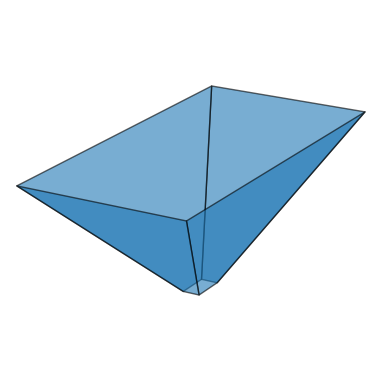

In [87]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

def create_stadium_frustum(bottom_width, height, x_elongation_factor=1.5, y_elongation_factor=2.0, steepness_factor=0.5):
    """
    Create vertices and faces for a flipped, steep, stadium-like frustum.
    """
    # Adjust the dimensions for steepness and elongation
    top_half_x = (bottom_width / 2) * x_elongation_factor  # Larger base at the top (X-axis)
    top_half_y = (bottom_width / 2) * y_elongation_factor  # Larger base at the top (Y-axis)
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor  # Smaller base at the bottom (X-axis)
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor  # Smaller base at the bottom (Y-axis)
    z_levels = [0, height]

    # Vertices for the frustum
    vertices = [
        [top_half_x, top_half_y, z_levels[1]],       # Top outer vertices (larger base)
        [-top_half_x, top_half_y, z_levels[1]],
        [-top_half_x, -top_half_y, z_levels[1]],
        [top_half_x, -top_half_y, z_levels[1]],
        [bottom_half_x, bottom_half_y, z_levels[0]],  # Bottom outer vertices (smaller base)
        [-bottom_half_x, bottom_half_y, z_levels[0]],
        [-bottom_half_x, -bottom_half_y, z_levels[0]],
        [bottom_half_x, -bottom_half_y, z_levels[0]],
    ]

    # Faces for the frustum
    faces = []

    # Connect sides
    for i in range(4):
        faces.append([
            vertices[i],
            vertices[(i + 1) % 4],
            vertices[(i + 1) % 4 + 4],
            vertices[i + 4],
        ])

    # No top or bottom faces (open structure)
    return faces

def plot_stadium_frustum(faces):
    """
    Plot the flipped stadium-like frustum using matplotlib.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot faces
    for face in faces:
        poly3d = Poly3DCollection([face], alpha=0.6, edgecolor='k')
        ax.add_collection3d(poly3d)

    # Adjust the viewing angle for a better view
    ax.view_init(elev=20, azim=30)

    ax.grid(False)
    ax.axis('off')


    # Set limits and labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-12, 12])
    ax.set_ylim([-12, 12])
    ax.set_zlim([0, height + 2])
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    plt.show()


# Parameters for the stadium-like frustum
bottom_width = 7
height = 5
x_elongation_factor = 6.0  # Stretch along the X-axis
y_elongation_factor = 3.0  # Stretch along the Y-axis
steepness_factor = 0.1     # Adjust steepness (smaller value = steeper sides)

# Create and plot the flipped, stadium-like frustum
flipped_stadium_faces = create_stadium_frustum(bottom_width, height, x_elongation_factor, y_elongation_factor, steepness_factor)
plot_stadium_frustum(flipped_stadium_faces)


# Mapping the 2D Mexican Wave onto 3D Frustum

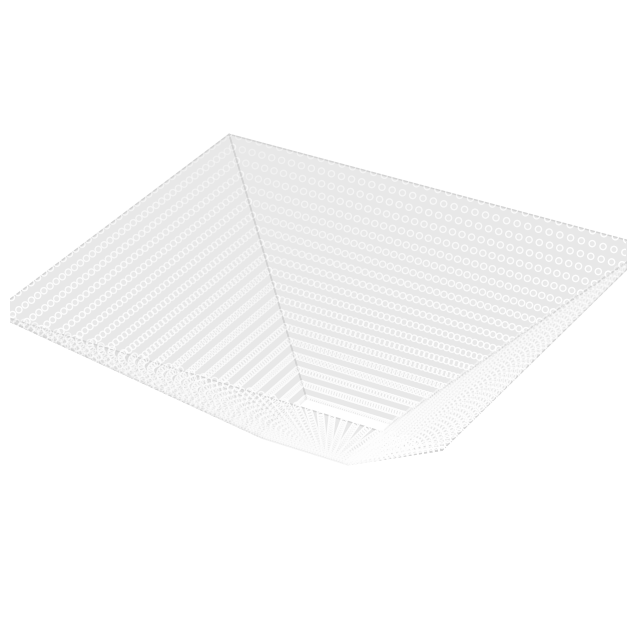

In [91]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the stadium frustum
bottom_width = 7
height = 5
x_elongation_factor = 3.0
y_elongation_factor = 4.0
steepness_factor = 0.2

# Mexican wave simulation parameters
GRID_SIZE = (40, 80)  # Rows, Columns
REFRACTORY_PERIOD = 20
THRESHOLD = 1.0
CUTOFF_RADIUS = 3
state_colors = {0: "white", 1: "black", -1: "red"}  # Seated, Active, Refractory


# Initialize simulation grid
def initialize_wave_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2
    grid[center_x - 1:center_x + 1, center_y:center_y + 3] = 1  # Trigger wave
    return grid, refractory_counters


# Create frustum vertices
def create_flipped_stadium_frustum():
    top_half_x = (bottom_width / 2) * x_elongation_factor
    top_half_y = (bottom_width / 2) * y_elongation_factor
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor

    top_vertices = np.array([
        [top_half_x, top_half_y, height],
        [-top_half_x, top_half_y, height],
        [-top_half_x, -top_half_y, height],
        [top_half_x, -top_half_y, height],
    ])
    bottom_vertices = np.array([
        [bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, -bottom_half_y, 0],
        [bottom_half_x, -bottom_half_y, 0],
    ])
    return top_vertices, bottom_vertices


# Map 2D grid slices to frustum sides
def map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices):
    rows, cols = GRID_SIZE
    slices = [
        grid[:, :cols // 4],  # Slice 1
        grid[:, cols // 4:cols // 2],  # Slice 2
        grid[:, cols // 2:3 * cols // 4],  # Slice 3
        grid[:, 3 * cols // 4:],  # Slice 4
    ]

    # Map each slice to a corresponding frustum side
    grid_points = []
    for i, slice in enumerate(slices):
        face_top = [top_vertices[i], top_vertices[(i + 1) % 4]]
        face_bottom = [bottom_vertices[i], bottom_vertices[(i + 1) % 4]]
        slice_points = map_slice_to_side(slice, face_top, face_bottom)
        grid_points.append(slice_points)

    return grid_points


# Map a single slice to a frustum side
def map_slice_to_side(slice, face_top, face_bottom):
    rows, cols = slice.shape
    points = []

    for i in range(rows):
        row_frac = i / (rows - 1)
        top_edge = np.array(face_top[0]) * (1 - row_frac) + np.array(face_top[1]) * row_frac
        bottom_edge = np.array(face_bottom[0]) * (1 - row_frac) + np.array(face_bottom[1]) * row_frac

        for j in range(cols):
            col_frac = j / (cols - 1)
            x = bottom_edge[0] * (1 - col_frac) + top_edge[0] * col_frac
            y = bottom_edge[1] * (1 - col_frac) + top_edge[1] * col_frac
            z = bottom_edge[2] * (1 - col_frac) + top_edge[2] * col_frac
            points.append([x, y, z])

    return np.array(points)


# Update wave grid
def update_wave(grid, refractory_counters):
    new_grid = np.copy(grid)
    rows, cols = grid.shape

    for x in range(rows):
        for y in range(cols):
            if grid[x, y] == 0:  # Excitable state
                influence = 0
                for dx in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for dy in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx, ny = x + dx, (y + dy) % cols
                        if 0 <= nx < rows and grid[nx, ny] == 1:
                            influence += 1
                if influence > THRESHOLD:
                    new_grid[x, y] = 1
            elif grid[x, y] == 1:  # Active state
                new_grid[x, y] = -1
                refractory_counters[x, y] = REFRACTORY_PERIOD
            elif grid[x, y] == -1:  # Refractory state
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0
    return new_grid


# Animate the stadium wave with frustum
def run_simulation():
    grid, refractory_counters = initialize_wave_grid()
    top_vertices, bottom_vertices = create_flipped_stadium_frustum()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the frustum
    frustum_faces = [
        [top_vertices[0], top_vertices[1], bottom_vertices[1], bottom_vertices[0]],
        [top_vertices[1], top_vertices[2], bottom_vertices[2], bottom_vertices[1]],
        [top_vertices[2], top_vertices[3], bottom_vertices[3], bottom_vertices[2]],
        [top_vertices[3], top_vertices[0], bottom_vertices[0], bottom_vertices[3]],
    ]
    for face in frustum_faces:
        ax.add_collection3d(art3d.Poly3DCollection([face], color='lightgray', alpha=0.5))

    # Initialize scatter plots for each face
    scatter_plots = [ax.scatter([], [], [], c=[], s=20) for _ in range(4)]

    def update_plot(frame):
        nonlocal grid, refractory_counters
        grid[:] = update_wave(grid, refractory_counters)

        # Map grid slices to the frustum
        grid_points = map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices)

        # Update scatter plots for each face
        for i, points in enumerate(grid_points):
            slice_colors = [
                state_colors[state]
                for state in grid[:, i * (GRID_SIZE[1] // 4):(i + 1) * (GRID_SIZE[1] // 4)].flatten()
            ]
            scatter_plots[i]._offsets3d = (points[:, 0], points[:, 1], points[:, 2])
            scatter_plots[i].set_color(slice_colors)

        return scatter_plots

    # Adjust axis limits for zoomed view
    ax.set_xlim([-8, 8])
    ax.set_ylim([-12, 12])
    ax.set_zlim([0, 8])

    ax.axis('off')  # Hide axes
    ani = FuncAnimation(fig, update_plot, frames=200, interval=100, blit=True)

    # Save the animation as a GIF
    ani.save("Stadiumwave_slices.gif", writer="pillow")

    plt.show()


# Run the simulation
run_simulation()


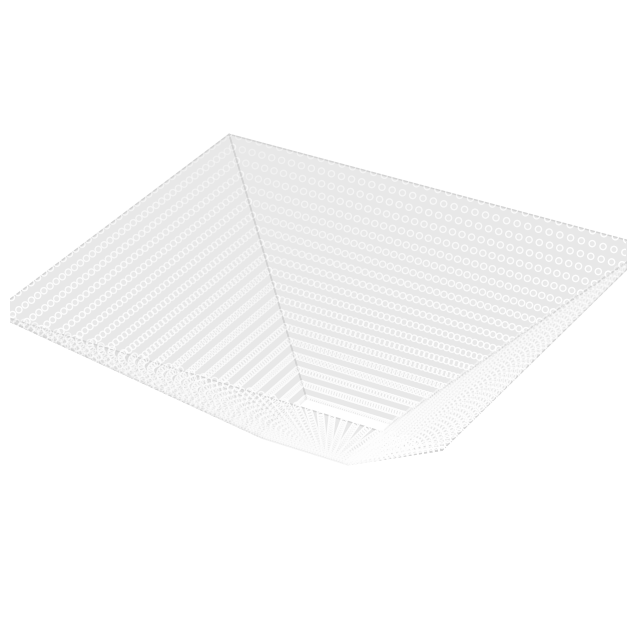

In [92]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the stadium frustum
bottom_width = 7
height = 5
x_elongation_factor = 3.0
y_elongation_factor = 4.0
steepness_factor = 0.2

# Mexican wave simulation parameters
GRID_SIZE = (40, 80)  # Rows, Columns
REFRACTORY_PERIOD = 20
THRESHOLD = 1.0
CUTOFF_RADIUS = 3
state_colors = {0: "white", 1: "black", -1: "red"}  # Seated, Active, Refractory


# Initialize simulation grid
def initialize_wave_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x, center_y = GRID_SIZE[0] // 2, 0  # Start on Slice 1
    grid[center_x - 1:center_x + 1, center_y:center_y + 3] = 1  # Trigger wave
    return grid, refractory_counters


# Create frustum vertices
def create_flipped_stadium_frustum():
    top_half_x = (bottom_width / 2) * x_elongation_factor
    top_half_y = (bottom_width / 2) * y_elongation_factor
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor

    top_vertices = np.array([
        [top_half_x, top_half_y, height],
        [-top_half_x, top_half_y, height],
        [-top_half_x, -top_half_y, height],
        [top_half_x, -top_half_y, height],
    ])
    bottom_vertices = np.array([
        [bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, -bottom_half_y, 0],
        [bottom_half_x, -bottom_half_y, 0],
    ])
    return top_vertices, bottom_vertices


# Map 2D grid slices to frustum sides
def map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices):
    rows, cols = GRID_SIZE
    slices = [
        grid[:, :cols // 4],  # Slice 1
        grid[:, cols // 4:cols // 2],  # Slice 2
        grid[:, cols // 2:3 * cols // 4],  # Slice 3
        grid[:, 3 * cols // 4:],  # Slice 4
    ]

    # Map each slice to a corresponding frustum side
    grid_points = []
    for i, slice in enumerate(slices):
        face_top = [top_vertices[i], top_vertices[(i + 1) % 4]]
        face_bottom = [bottom_vertices[i], bottom_vertices[(i + 1) % 4]]
        slice_points = map_slice_to_side(slice, face_top, face_bottom)
        grid_points.append(slice_points)

    return grid_points


# Map a single slice to a frustum side
def map_slice_to_side(slice, face_top, face_bottom):
    rows, cols = slice.shape
    points = []

    for i in range(rows):
        row_frac = i / (rows - 1)
        top_edge = np.array(face_top[0]) * (1 - row_frac) + np.array(face_top[1]) * row_frac
        bottom_edge = np.array(face_bottom[0]) * (1 - row_frac) + np.array(face_bottom[1]) * row_frac

        for j in range(cols):
            col_frac = j / (cols - 1)
            x = bottom_edge[0] * (1 - col_frac) + top_edge[0] * col_frac
            y = bottom_edge[1] * (1 - col_frac) + top_edge[1] * col_frac
            z = bottom_edge[2] * (1 - col_frac) + top_edge[2] * col_frac
            points.append([x, y, z])

    return np.array(points)


# Update wave grid with circular propagation
def update_wave(grid, refractory_counters):
    new_grid = np.copy(grid)
    rows, cols = grid.shape
    slice_width = cols // 4

    # Handle intra-slice updates
    for x in range(rows):
        for y in range(cols):
            if grid[x, y] == 0:  # Excitable state
                influence = 0
                for dx in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for dy in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx, ny = x + dx, (y + dy) % cols
                        if 0 <= nx < rows and grid[nx, ny] == 1:
                            influence += 1
                if influence > THRESHOLD:
                    new_grid[x, y] = 1
            elif grid[x, y] == 1:  # Active state
                new_grid[x, y] = -1
                refractory_counters[x, y] = REFRACTORY_PERIOD
            elif grid[x, y] == -1:  # Refractory state
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0

    # Handle inter-slice propagation
    for i in range(4):  # For each slice
        slice_end = (i + 1) * slice_width - 1
        next_slice_start = (i + 1) % 4 * slice_width

        # Activate the edge of the next slice if the current slice edge is active
        if np.any(grid[:, slice_end] == 1):  # If the right edge of the current slice is active
            new_grid[:, next_slice_start] = 1  # Activate the left edge of the next slice

    return new_grid


# Animate the stadium wave with frustum
def run_simulation():
    grid, refractory_counters = initialize_wave_grid()
    top_vertices, bottom_vertices = create_flipped_stadium_frustum()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the frustum
    frustum_faces = [
        [top_vertices[0], top_vertices[1], bottom_vertices[1], bottom_vertices[0]],
        [top_vertices[1], top_vertices[2], bottom_vertices[2], bottom_vertices[1]],
        [top_vertices[2], top_vertices[3], bottom_vertices[3], bottom_vertices[2]],
        [top_vertices[3], top_vertices[0], bottom_vertices[0], bottom_vertices[3]],
    ]
    for face in frustum_faces:
        ax.add_collection3d(art3d.Poly3DCollection([face], color='lightgray', alpha=0.5))

    # Initialize scatter plots for each face
    scatter_plots = [ax.scatter([], [], [], c=[], s=20) for _ in range(4)]

    def update_plot(frame):
        nonlocal grid, refractory_counters
        grid[:] = update_wave(grid, refractory_counters)

        # Map grid slices to the frustum
        grid_points = map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices)

        # Update scatter plots for each face
        for i, points in enumerate(grid_points):
            slice_colors = [
                state_colors[state]
                for state in grid[:, i * (GRID_SIZE[1] // 4):(i + 1) * (GRID_SIZE[1] // 4)].flatten()
            ]
            scatter_plots[i]._offsets3d = (points[:, 0], points[:, 1], points[:, 2])
            scatter_plots[i].set_color(slice_colors)

        return scatter_plots

    # Adjust axis limits for zoomed view
    ax.set_xlim([-8, 8])
    ax.set_ylim([-12, 12])
    ax.set_zlim([0, 8])

    ax.axis('off')  # Hide axes
    ani = FuncAnimation(fig, update_plot, frames=200, interval=100, blit=True)

    # Save the animation as a GIF
    ani.save("Stadiumwave_circular.gif", writer="pillow")

    plt.show()


# Run the simulation
run_simulation()


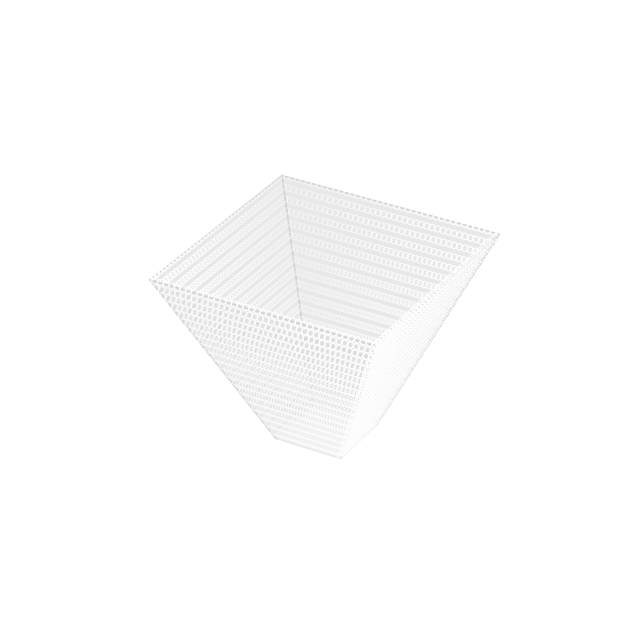

In [93]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the stadium frustum
bottom_width = 4
height = 5
x_elongation_factor = 2.0
y_elongation_factor = 3.0
steepness_factor = 0.3

# Mexican wave simulation parameters
GRID_SIZE = (40, 80)  # Rows, Columns
REFRACTORY_PERIOD = 20
THRESHOLD = 1.0
CUTOFF_RADIUS = 3
state_colors = {0: "white", 1: "black", -1: "red"}  # Seated, Active, Refractory


# Initialize simulation grid
def initialize_wave_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x, center_y = GRID_SIZE[0] // 2, GRID_SIZE[1] // 2
    grid[center_x - 1:center_x + 1, center_y:center_y + 3] = 1  # Trigger wave
    return grid, refractory_counters


# Create frustum vertices
def create_flipped_stadium_frustum():
    top_half_x = (bottom_width / 2) * x_elongation_factor
    top_half_y = (bottom_width / 2) * y_elongation_factor
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor

    top_vertices = np.array([
        [top_half_x, top_half_y, height],
        [-top_half_x, top_half_y, height],
        [-top_half_x, -top_half_y, height],
        [top_half_x, -top_half_y, height],
    ])
    bottom_vertices = np.array([
        [bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, -bottom_half_y, 0],
        [bottom_half_x, -bottom_half_y, 0],
    ])
    return top_vertices, bottom_vertices


# Map 2D grid sections to each frustum side
def map_grid_to_frustum_sides(grid, GRID_SIZE, top_vertices, bottom_vertices):
    rows, cols = GRID_SIZE
    side_sections = [
        grid[:, :cols // 4],  # Section 1: top-left
        grid[:, cols // 4:cols // 2],  # Section 2: top-right
        grid[:, cols // 2:3 * cols // 4],  # Section 3: bottom-left
        grid[:, 3 * cols // 4:],  # Section 4: bottom-right
    ]

    # Map each section to its respective frustum face
    grid_points = []
    for i, section in enumerate(side_sections):
        face_top = [top_vertices[i], top_vertices[(i + 1) % 4]]
        face_bottom = [bottom_vertices[i], bottom_vertices[(i + 1) % 4]]
        section_points = map_section_to_face(section, face_top, face_bottom)
        grid_points.append(section_points)

    return grid_points


# Map a single section to a frustum face
def map_section_to_face(section, face_top, face_bottom):
    rows, cols = section.shape
    points = []

    for i in range(rows):
        row_frac = i / (rows - 1)
        top_edge = np.array(face_top[0]) * (1 - row_frac) + np.array(face_top[1]) * row_frac
        bottom_edge = np.array(face_bottom[0]) * (1 - row_frac) + np.array(face_bottom[1]) * row_frac

        for j in range(cols):
            col_frac = j / (cols - 1)
            x = bottom_edge[0] * (1 - col_frac) + top_edge[0] * col_frac
            y = bottom_edge[1] * (1 - col_frac) + top_edge[1] * col_frac
            z = bottom_edge[2] * (1 - col_frac) + top_edge[2] * col_frac
            points.append([x, y, z])

    return np.array(points)


# Update wave grid
def update_wave(grid, refractory_counters):
    new_grid = np.copy(grid)
    rows, cols = grid.shape

    for x in range(rows):
        for y in range(cols):
            if grid[x, y] == 0:  # Excitable state
                influence = 0
                for dx in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                    for dy in range(-CUTOFF_RADIUS, CUTOFF_RADIUS + 1):
                        nx, ny = x + dx, (y + dy) % cols
                        if 0 <= nx < rows and grid[nx, ny] == 1:
                            influence += 1
                if influence > THRESHOLD:
                    new_grid[x, y] = 1
            elif grid[x, y] == 1:  # Active state
                new_grid[x, y] = -1
                refractory_counters[x, y] = REFRACTORY_PERIOD
            elif grid[x, y] == -1:  # Refractory state
                refractory_counters[x, y] -= 1
                if refractory_counters[x, y] <= 0:
                    new_grid[x, y] = 0
    return new_grid


# Animate the stadium wave with frustum
def run_simulation():
    grid, refractory_counters = initialize_wave_grid()
    top_vertices, bottom_vertices = create_flipped_stadium_frustum()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the frustum
    frustum_faces = [
        [top_vertices[0], top_vertices[1], bottom_vertices[1], bottom_vertices[0]],
        [top_vertices[1], top_vertices[2], bottom_vertices[2], bottom_vertices[1]],
        [top_vertices[2], top_vertices[3], bottom_vertices[3], bottom_vertices[2]],
        [top_vertices[3], top_vertices[0], bottom_vertices[0], bottom_vertices[3]],
    ]
    for face in frustum_faces:
        ax.add_collection3d(art3d.Poly3DCollection([face], color='lightgray', alpha=0.5))

    # Initialize scatter plots for each face
    scatter_plots = [ax.scatter([], [], [], c=[], s=20) for _ in range(4)]

    def update_plot(frame):
        nonlocal grid, refractory_counters
        grid[:] = update_wave(grid, refractory_counters)

        # Map grid sections to the frustum
        grid_points = map_grid_to_frustum_sides(grid, GRID_SIZE, top_vertices, bottom_vertices)

        # Update scatter plots for each face
        for i, points in enumerate(grid_points):
            section_colors = [
                state_colors[grid[row, col]]
                for row in range(grid.shape[0])
                for col in range(grid.shape[1] // 4)
            ]
            scatter_plots[i]._offsets3d = (points[:, 0], points[:, 1], points[:, 2])
            scatter_plots[i].set_color(section_colors)

        return scatter_plots

    # Zoom in slightly for better visibility
    ax.set_xlim([-6, 6])
    ax.set_ylim([-9, 9])
    ax.set_zlim([0, 7])

    ax.axis('off')  # Hide axes
    ani = FuncAnimation(fig, update_plot, frames=200, interval=100, blit=True)

    # Save the animation as a GIF
    ani.save("Stadiumwave_split.gif", writer="pillow")

    plt.show()


# Run the simulation
run_simulation()


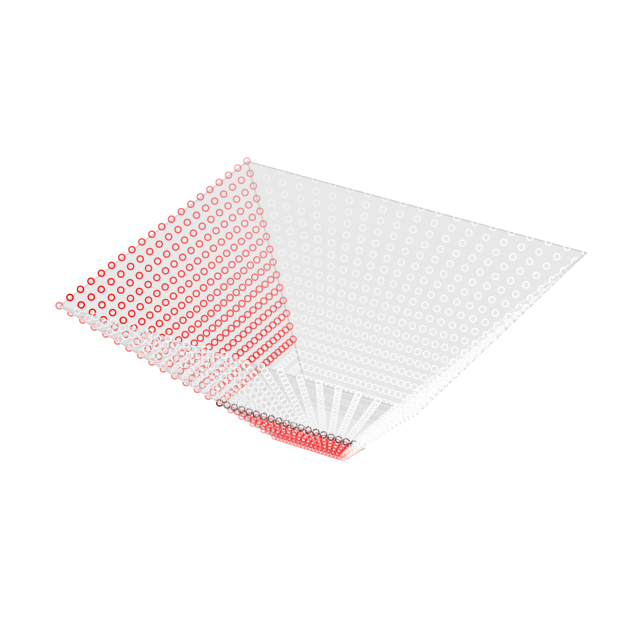

In [94]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the stadium frustum
bottom_width = 7
height = 5
x_elongation_factor = 3.0
y_elongation_factor = 4.0
steepness_factor = 0.2

# Mexican wave simulation parameters
GRID_SIZE = (20, 80)  # Rows, Columns
REFRACTORY_PERIOD = 20
THRESHOLD = 1.0
state_colors = {0: "white", 1: "black", -1: "red"}  # Seated, Active, Refractory


# Initialize simulation grid
def initialize_wave_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x = GRID_SIZE[0] // 2
    grid[center_x, 0:3] = 1  # Trigger the wave at the leftmost edge of Slice 1
    return grid, refractory_counters


# Create frustum vertices
def create_flipped_stadium_frustum():
    top_half_x = (bottom_width / 2) * x_elongation_factor
    top_half_y = (bottom_width / 2) * y_elongation_factor
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor

    top_vertices = np.array([
        [top_half_x, top_half_y, height],
        [-top_half_x, top_half_y, height],
        [-top_half_x, -top_half_y, height],
        [top_half_x, -top_half_y, height],
    ])
    bottom_vertices = np.array([
        [bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, -bottom_half_y, 0],
        [bottom_half_x, -bottom_half_y, 0],
    ])
    return top_vertices, bottom_vertices


# Map 2D grid slices to frustum sides
def map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices):
    rows, cols = GRID_SIZE
    slice_width = cols // 4
    slices = [
        grid[:, i * slice_width:(i + 1) * slice_width] for i in range(4)
    ]

    grid_points = []
    for i, slice in enumerate(slices):
        face_top = [top_vertices[i], top_vertices[(i + 1) % 4]]
        face_bottom = [bottom_vertices[i], bottom_vertices[(i + 1) % 4]]
        slice_points = map_slice_to_side(slice, face_top, face_bottom)
        grid_points.append(slice_points)

    return grid_points


# Map a single slice to a frustum side
def map_slice_to_side(slice, face_top, face_bottom):
    rows, cols = slice.shape
    points = []

    for i in range(rows):
        row_frac = i / (rows - 1)
        top_edge = np.array(face_top[0]) * (1 - row_frac) + np.array(face_top[1]) * row_frac
        bottom_edge = np.array(face_bottom[0]) * (1 - row_frac) + np.array(face_bottom[1]) * row_frac

        for j in range(cols):
            col_frac = j / (cols - 1)
            x = bottom_edge[0] * (1 - col_frac) + top_edge[0] * col_frac
            y = bottom_edge[1] * (1 - col_frac) + top_edge[1] * col_frac
            z = bottom_edge[2] * (1 - col_frac) + top_edge[2] * col_frac
            points.append([x, y, z])

    return np.array(points)


# Update wave grid with sideways propagation
def update_wave(grid, refractory_counters):
    new_grid = np.copy(grid)
    rows, cols = grid.shape
    slice_width = cols // 4

    # Propagate wave horizontally
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 0:  # Excitable
                if j > 0 and grid[i, j - 1] == 1:  # Check left neighbor
                    new_grid[i, j] = 1
            elif grid[i, j] == 1:  # Active
                new_grid[i, j] = -1
                refractory_counters[i, j] = REFRACTORY_PERIOD
            elif grid[i, j] == -1:  # Refractory
                refractory_counters[i, j] -= 1
                if refractory_counters[i, j] <= 0:
                    new_grid[i, j] = 0

    # Pass wave to the next slice
    for slice_index in range(4):
        slice_end = (slice_index + 1) * slice_width - 1
        next_slice_start = (slice_index + 1) % 4 * slice_width
        if np.any(grid[:, slice_end] == 1):  # If edge of current slice is active
            new_grid[:, next_slice_start] = 1  # Activate next slice's edge

    return new_grid


# Animate the stadium wave with frustum
def run_simulation():
    grid, refractory_counters = initialize_wave_grid()
    top_vertices, bottom_vertices = create_flipped_stadium_frustum()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the frustum
    frustum_faces = [
        [top_vertices[0], top_vertices[1], bottom_vertices[1], bottom_vertices[0]],
        [top_vertices[1], top_vertices[2], bottom_vertices[2], bottom_vertices[1]],
        [top_vertices[2], top_vertices[3], bottom_vertices[3], bottom_vertices[2]],
        [top_vertices[3], top_vertices[0], bottom_vertices[0], bottom_vertices[3]],
    ]
    for face in frustum_faces:
        ax.add_collection3d(art3d.Poly3DCollection([face], color='lightgray', alpha=0.5))

    scatter_plots = [ax.scatter([], [], [], c=[], s=20) for _ in range(4)]

    def update_plot(frame):
        nonlocal grid, refractory_counters
        grid[:] = update_wave(grid, refractory_counters)
        grid_points = map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices)

        for i, points in enumerate(grid_points):
            slice_colors = [
                state_colors[state]
                for state in grid[:, i * (GRID_SIZE[1] // 4):(i + 1) * (GRID_SIZE[1] // 4)].flatten()
            ]
            scatter_plots[i]._offsets3d = (points[:, 0], points[:, 1], points[:, 2])
            scatter_plots[i].set_color(slice_colors)

        return scatter_plots

    ax.set_xlim([-10, 10])
    ax.set_ylim([-15, 15])
    ax.set_zlim([0, 8])
    ax.axis('off')

    ani = FuncAnimation(fig, update_plot, frames=200, interval=100, blit=True)
    ani.save("Stadiumwave_corrected.gif", writer="pillow")
    plt.show()


# Run the simulation
run_simulation()


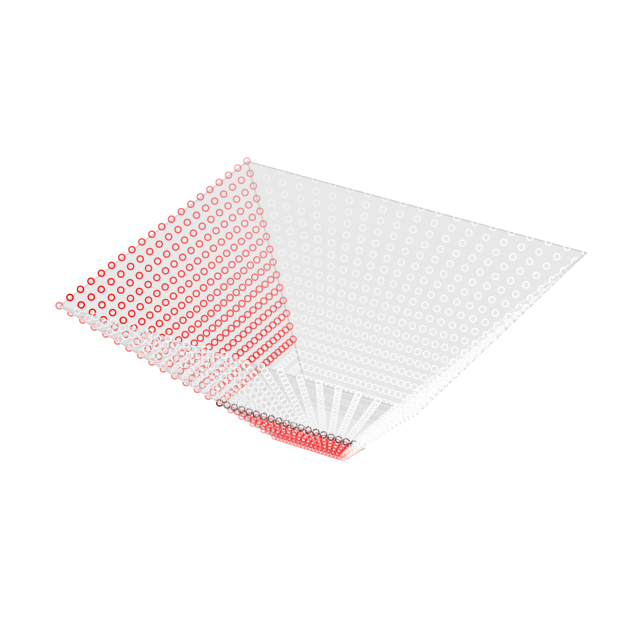

In [98]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the stadium frustum
bottom_width = 7
height = 5
x_elongation_factor = 3.0
y_elongation_factor = 4.0
steepness_factor = 0.2

# Mexican wave simulation parameters
GRID_SIZE = (20, 80)  # Rows, Columns
REFRACTORY_PERIOD = 20
THRESHOLD = 1.0
state_colors = {0: "white", 1: "black", -1: "red"}  # Seated, Active, Refractory


# Initialize simulation grid
def initialize_wave_grid():
    grid = np.zeros(GRID_SIZE, dtype=int)
    refractory_counters = np.zeros(GRID_SIZE, dtype=int)
    center_x = GRID_SIZE[0] // 2
    grid[center_x, 0:3] = 1  # Trigger the wave at the leftmost edge of Slice 1
    return grid, refractory_counters


# Create frustum vertices
def create_flipped_stadium_frustum():
    top_half_x = (bottom_width / 2) * x_elongation_factor
    top_half_y = (bottom_width / 2) * y_elongation_factor
    bottom_half_x = (bottom_width / 2) * steepness_factor * x_elongation_factor
    bottom_half_y = (bottom_width / 2) * steepness_factor * y_elongation_factor

    top_vertices = np.array([
        [top_half_x, top_half_y, height],
        [-top_half_x, top_half_y, height],
        [-top_half_x, -top_half_y, height],
        [top_half_x, -top_half_y, height],
    ])
    bottom_vertices = np.array([
        [bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, bottom_half_y, 0],
        [-bottom_half_x, -bottom_half_y, 0],
        [bottom_half_x, -bottom_half_y, 0],
    ])
    return top_vertices, bottom_vertices


# Map 2D grid slices to frustum sides
def map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices):
    rows, cols = GRID_SIZE
    slice_width = cols // 4
    slices = [
        grid[:, i * slice_width:(i + 1) * slice_width] for i in range(4)
    ]

    grid_points = []
    for i, slice in enumerate(slices):
        face_top = [top_vertices[i], top_vertices[(i + 1) % 4]]
        face_bottom = [bottom_vertices[i], bottom_vertices[(i + 1) % 4]]
        slice_points = map_slice_to_side(slice, face_top, face_bottom)
        grid_points.append(slice_points)

    return grid_points


# Map a single slice to a frustum side
def map_slice_to_side(slice, face_top, face_bottom):
    rows, cols = slice.shape
    points = []

    for i in range(rows):
        row_frac = i / (rows - 1)
        top_edge = np.array(face_top[0]) * (1 - row_frac) + np.array(face_top[1]) * row_frac
        bottom_edge = np.array(face_bottom[0]) * (1 - row_frac) + np.array(face_bottom[1]) * row_frac

        for j in range(cols):
            col_frac = j / (cols - 1)
            x = bottom_edge[0] * (1 - col_frac) + top_edge[0] * col_frac
            y = bottom_edge[1] * (1 - col_frac) + top_edge[1] * col_frac
            z = bottom_edge[2] * (1 - col_frac) + top_edge[2] * col_frac
            points.append([x, y, z])

    return np.array(points)


# Update wave grid with sideways propagation
def update_wave(grid, refractory_counters):
    new_grid = np.copy(grid)
    rows, cols = grid.shape
    slice_width = cols // 4

    # Horizontal propagation (left-to-right only)
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 0:  # Excitable state
                if j > 0 and grid[i, j - 1] == 1:  # Check left neighbor
                    new_grid[i, j] = 1
            elif grid[i, j] == 1:  # Active state
                new_grid[i, j] = -1
                refractory_counters[i, j] = REFRACTORY_PERIOD
            elif grid[i, j] == -1:  # Refractory state
                refractory_counters[i, j] -= 1
                if refractory_counters[i, j] <= 0:
                    new_grid[i, j] = 0

    # Pass wave horizontally between slices
    for slice_index in range(4):
        slice_end = (slice_index + 1) * slice_width - 1  # Right edge of current slice
        next_slice_start = (slice_index + 1) % 4 * slice_width  # Left edge of next slice
        if np.any(grid[:, slice_end] == 1):  # Check if wave reaches the edge
            new_grid[:, next_slice_start] = 1  # Activate left edge of next slice

    return new_grid


# Animate the stadium wave with frustum
def run_simulation():
    grid, refractory_counters = initialize_wave_grid()
    top_vertices, bottom_vertices = create_flipped_stadium_frustum()

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the frustum
    frustum_faces = [
        [top_vertices[0], top_vertices[1], bottom_vertices[1], bottom_vertices[0]],
        [top_vertices[1], top_vertices[2], bottom_vertices[2], bottom_vertices[1]],
        [top_vertices[2], top_vertices[3], bottom_vertices[3], bottom_vertices[2]],
        [top_vertices[3], top_vertices[0], bottom_vertices[0], bottom_vertices[3]],
    ]
    for face in frustum_faces:
        ax.add_collection3d(art3d.Poly3DCollection([face], color='lightgray', alpha=0.5))

    scatter_plots = [ax.scatter([], [], [], c=[], s=20) for _ in range(4)]

    def update_plot(frame):
        nonlocal grid, refractory_counters
        grid[:] = update_wave(grid, refractory_counters)
        grid_points = map_grid_to_frustum_slices(grid, GRID_SIZE, top_vertices, bottom_vertices)

        for i, points in enumerate(grid_points):
            slice_colors = [
                state_colors[state]
                for state in grid[:, i * (GRID_SIZE[1] // 4):(i + 1) * (GRID_SIZE[1] // 4)].flatten()
            ]
            scatter_plots[i]._offsets3d = (points[:, 0], points[:, 1], points[:, 2])
            scatter_plots[i].set_color(slice_colors)

        return scatter_plots

    ax.set_xlim([-10, 10])
    ax.set_ylim([-15, 15])
    ax.set_zlim([0, 8])
    ax.axis('off')

    ani = FuncAnimation(fig, update_plot, frames=200, interval=100, blit=True)
    ani.save("Stadiumwave_final.gif", writer="pillow")
    plt.show()


# Run the simulation
run_simulation()


Test a equal size stadium - same number of rows and columns

Figure out the slicing better

